## Detected photons

This notebook shows maximum possible recall because of the small number of detected photons

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import sys
sys.path.append('../../')

In [4]:
from farichlib import DataPreprocessing

In [5]:
dp = DataPreprocessing()
dp.parse_root('../../data/farichSimRes_e-mu-_1000MeV_25-90deg_30.0k_2020-02-07.root', \
'../../data/farichSimRes_pi-kaon-_1000MeV_0-90deg_50.0k_2020-02-11.root')

In [7]:
X, y = dp.get_images()

In [8]:
n_photons = np.array( list(map( lambda x: len(x.row), X )) )

Lets see the probability density of the number of detected photons

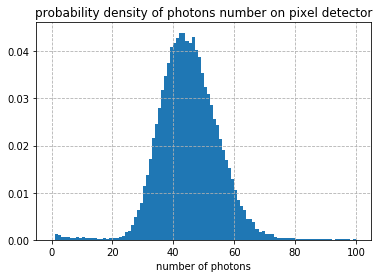

In [9]:
plt.hist(n_photons, range=(0, 100), bins=100, density=True);
plt.grid(ls='--')
plt.xlabel('number of photons');
plt.title('probability density of photons number on pixel detector');

Really we can find the events with number of photons more than 5 (because an ellipse has five parameters: xc, yc, a, b, $\varphi$)

Now lets see the probability to get an event with number of detected photons less than $n$  

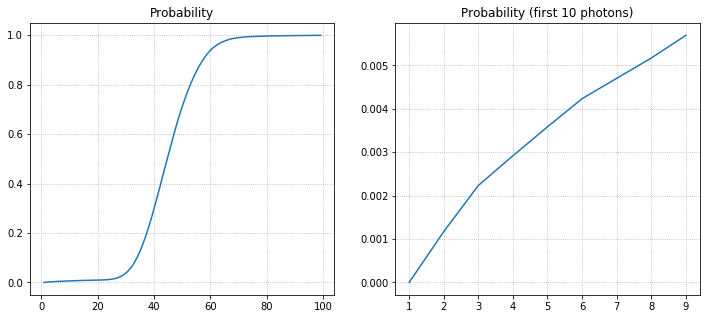

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot( range(1, 100), [ np.sum(n_photons<i)/len(n_photons) for i in range(1, 100)])
plt.title('Probability')
plt.grid(ls=':')
plt.subplot(122)
plt.plot( range(1, 10), [ np.sum(n_photons<i)/len(n_photons) for i in range(1, 10)])
plt.title('Probability (first 10 photons)')
plt.grid(ls=':')

So, the probability to see the event with 5 or less photons about 0.4% - really small probability.

Additionaly, lets see such events

In [11]:
ind = np.argwhere(n_photons<5).ravel()

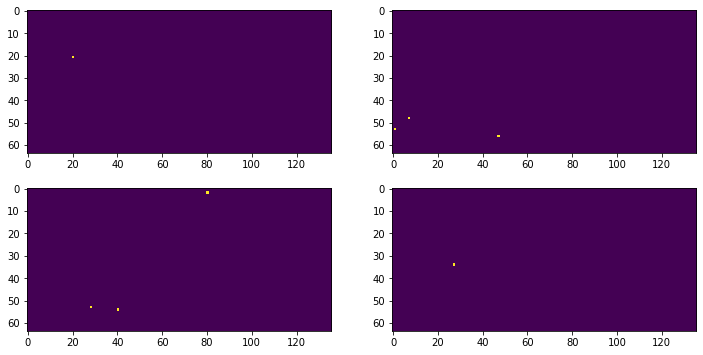

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(221)
plt.imshow(X[ind[0]].toarray())
plt.subplot(222)
plt.imshow(X[ind[1]].toarray())
plt.subplot(223)
plt.imshow(X[ind[2]].toarray())
plt.subplot(224)
plt.imshow(X[ind[3]].toarray())

## But
Interesting fact: events with zero photons we cannot see after DataPreprocessing, but the used there files have totally 80000 events but we see only `len(X) = 55508` -> `1 - 55508/80000 = 0.30` events are not detected!

In [41]:
1 - len(X)/80000

0.30615000000000003

Check that fact

In [2]:
import uproot

In [3]:
tt = uproot.open('../../data/farichSimRes_pi-kaon-_1000MeV_0-90deg_50.0k_2020-02-11.root')['raw_data']

In [4]:
hits = tt.pandas.df(branches='hits')

In [15]:
hits.head()

,hits
entry,
0,41
1,0
2,39
3,43
4,41


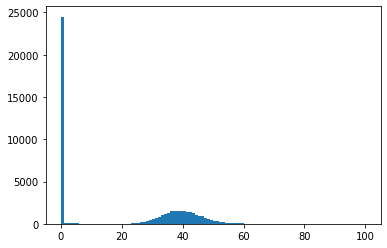

In [12]:
plt.hist(hits.hits, bins=100, range=(0,100));

Really so many events without detected photons

In [14]:
(hits.hits==0).sum()/len(hits.hits)

0.48984

About **50%** events with zero detected photons